In [2]:
%matplotlib inline

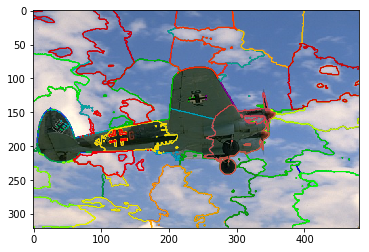

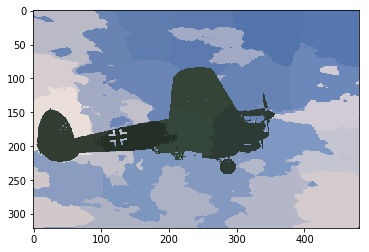

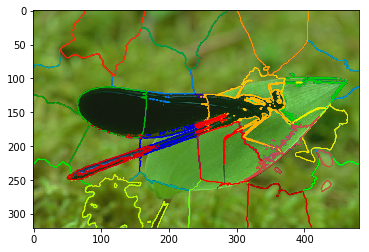

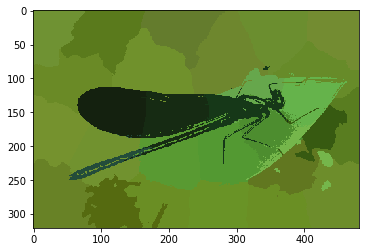

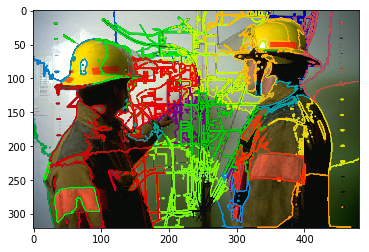

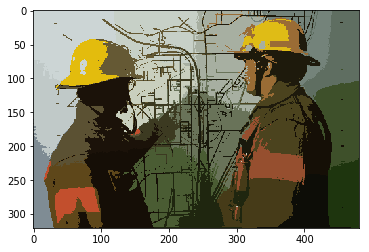

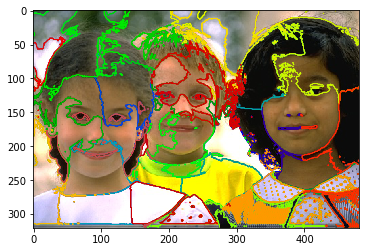

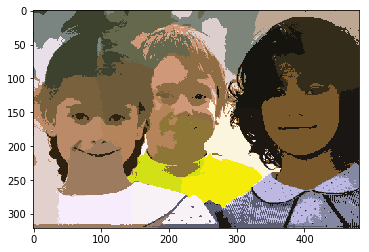

In [27]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

size = (321, 481)
tempy = np.arange(1, size[0] + 1, dtype=np.int32)
tempx = np.arange(1, size[1] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(tempx, tempy)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))

no_of_clusters = 30

for image_name in images:
    img = cv2.imread("images/" + image_name)
    reshaped_img = img.reshape((-1, 3))

    X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
    for i in range(reshaped_img.shape[0]):
        X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))

    mbkm = MiniBatchKMeans(n_clusters=no_of_clusters)
    res = mbkm.fit_predict(X)

    val = np.zeros((no_of_clusters, 3), dtype=np.int64)
    cnt = np.zeros(no_of_clusters)
    for i in range(reshaped_img.shape[0]):
        val[res[i]] += reshaped_img[i]
        cnt[res[i]] += 1

    for i in range(no_of_clusters):
        val[i] = val[i] // cnt[i]

    final_res = np.empty((res.shape[0], 3), dtype=np.uint8)
    for i in range(res.shape[0]):
        final_res[i] = val[res[i]]

    final_res = final_res.reshape((size[0], size[1], 3))
    res = res.reshape(size)

    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    for i in range(no_of_clusters):
        plt.contour(res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
    plt.savefig("MiniBatchKMeans_1" + image_name)
    plt.show()
    
    plt.figure()
    plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
    plt.savefig("MiniBatchKMeans_2" + image_name)
    plt.show()